In [12]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __M

In [5]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(train_dir, batch_size=batch_size, shuffle=False, color_mode='rgb', target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(validation_dir, batch_size=batch_size, shuffle=False, color_mode='rgb', target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(PATH, batch_size=1, shuffle=False, color_mode='rgb', target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary', classes=['test'],)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


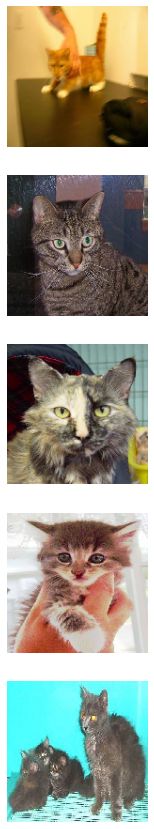

In [6]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [7]:
# 5
train_image_generator = ImageDataGenerator(rotation_range=90, width_shift_range=0.2,
    height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True,
    vertical_flip=True, rescale=1./255)


Found 2000 images belonging to 2 classes.


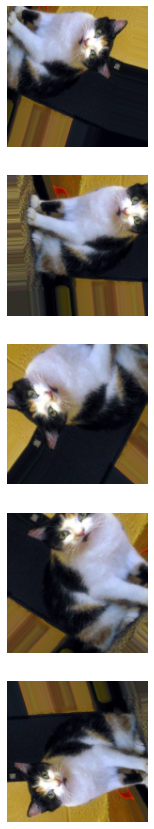

In [8]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [11]:
# 7
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same',
                 input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same'))

model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same'))

model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same'))

model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same'))

model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same'))

model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(1000, activation='relu', 
                kernel_initializer='he_uniform'))

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(100, activation='relu', 
                kernel_initializer='he_uniform'))

model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                      

In [13]:
# 8
checkpoint = ModelCheckpoint( filepath='./', monitor='val_acc', verbose=1, save_best_only=True, mode='auto', save_freq='epoch')
history = model.fit(x=train_data_gen, epochs=10, validation_data=val_data_gen, callbacks=[checkpoint])

Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 0.8785 - accuracy: 0.5640 

16/16 [==============================] - 442s 27s/step - loss: 0.8785 - accuracy: 0.5640 - val_loss: 4.1463 - val_accuracy: 0.5020
Epoch 2/10
16/16 [==============================] - ETA: 0s - loss: 0.7394 - accuracy: 0.6015 

16/16 [==============================] - 419s 26s/step - loss: 0.7394 - accuracy: 0.6015 - val_loss: 1.1621 - val_accuracy: 0.4790
Epoch 3/10
16/16 [==============================] - ETA: 0s - loss: 0.7013 - accuracy: 0.6280 

16/16 [==============================] - 426s 27s/step - loss: 0.7013 - accuracy: 0.6280 - val_loss: 0.9615 - val_accuracy: 0.5280
Epoch 4/10
16/16 [==============================] - ETA: 0s - loss: 0.6662 - accuracy: 0.6365 

16/16 [==============================] - 425s 27s/step - loss: 0.6662 - accuracy: 0.6365 - val_loss: 1.0338 - val_accuracy: 0.5510
Epoch 5/10
16/16 [==============================] - ETA: 0s - loss: 0.6406 - accuracy: 0.6530 

16/16 [==============================] - 425s 27s/step - loss: 0.6406 - accuracy: 0.6530 - val_loss: 0.8275 - val_accuracy: 0.5670
Epoch 6/10
16/16 [==============================] - ETA: 0s - loss: 0.6223 - accuracy: 0.6635 

16/16 [==============================] - 423s 27s/step - loss: 0.6223 - accuracy: 0.6635 - val_loss: 1.1005 - val_accuracy: 0.5310
Epoch 7/10
16/16 [==============================] - ETA: 0s - loss: 0.5916 - accuracy: 0.6935 

16/16 [==============================] - 421s 26s/step - loss: 0.5916 - accuracy: 0.6935 - val_loss: 0.8228 - val_accuracy: 0.5990
Epoch 8/10
16/16 [==============================] - ETA: 0s - loss: 0.5900 - accuracy: 0.6985 

16/16 [==============================] - 423s 27s/step - loss: 0.5900 - accuracy: 0.6985 - val_loss: 0.6989 - val_accuracy: 0.6090
Epoch 9/10
16/16 [==============================] - ETA: 0s - loss: 0.5884 - accuracy: 0.6905 

16/16 [==============================] - 423s 26s/step - loss: 0.5884 - accuracy: 0.6905 - val_loss: 1.0590 - val_accuracy: 0.5310
Epoch 10/10
16/16 [==============================] - ETA: 0s - loss: 0.5753 - accuracy: 0.7015 

16/16 [==============================] - 421s 26s/step - loss: 0.5753 - accuracy: 0.7015 - val_loss: 0.6489 - val_accuracy: 0.6490


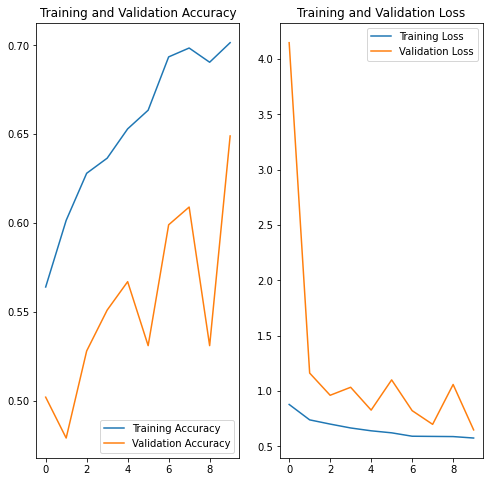

In [18]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
probabilities = [int(boolean) for boolean in model.predict(test_data_gen) > 0.5]
print(probabilities)

50/50 [==============================] - 4s 72ms/step
[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]


In [16]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!
